In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
price_data = pd.read_csv('E:/Downloads/DataCamp Guided Projects/NY AirBNB/data/airbnb_price.csv')
room_data = pd.read_excel('E:/Downloads/DataCamp Guided Projects/NY AirBNB/data/airbnb_room_type.xlsx')
review_data = pd.read_csv('E:/Downloads/DataCamp Guided Projects/NY AirBNB/data/airbnb_last_review.tsv',
                         sep = '\t')

In [3]:
price_data.sample(3)

,listing_id,price,nbhood_full
22193,33469797,190 dollars,"Queens, Jamaica"
20237,31474431,49 dollars,"Brooklyn, Sunset Park"
23545,34516874,100 dollars,"Brooklyn, Bedford-Stuyvesant"


In [4]:
room_data.sample(3)

,listing_id,description,room_type
22361,33595791,Beautiful Chelsea townhouse bedroom,private room
19431,30769985,Verona TwentyOne - Kendal Garden,Entire home/apt
1853,1777007,Space For guest,Shared room


In [5]:
review_data.sample(3)

,listing_id,host_name,last_review
20611,31950380,Gul,July 06 2019
1869,1802838,Lauren,May 20 2019
21252,32587918,Studioplus,May 29 2019


In [6]:
price_data.describe(include = 'all')

,listing_id,price,nbhood_full
count,2.520900e+04,25209,25209
unique,NaN,536,217
top,NaN,150 dollars,"Brooklyn, Bedford-Stuyvesant"
freq,NaN,982,2209
mean,2.068922e+07,NaN,NaN
std,1.102928e+07,NaN,NaN
min,2.595000e+03,NaN,NaN
25%,1.202273e+07,NaN,NaN
50%,2.234391e+07,NaN,NaN
75%,3.037669e+07,NaN,NaN


In [7]:
price_data.isnull().sum()

listing_id     0
price          0
nbhood_full    0
dtype: int64

In [8]:
# checking for diversity in base currency
price_data['price'].str.split(' ', expand = True)[1].value_counts()

dollars    25209
Name: 1, dtype: int64

#### *The values on the column "price" can be converted to integer type as all of them are recorded as dollar (USD probably).*

In [9]:
price_data['price'] = price_data['price'].str.split(' ', expand = True)[0].astype(int)

In [10]:
#storing the required response to the tasks
avg_price = round(price_data['price'].mean(), 2)
avg_price

141.78

In [11]:
# cheking for a pattern in the recorded values
price_data['nbhood_full'].sample(5)

13869     Manhattan, Roosevelt Island
17781              Brooklyn, Bushwick
16339          Brooklyn, Williamsburg
13456    Brooklyn, Bedford-Stuyvesant
4028                 Queens, Flushing
Name: nbhood_full, dtype: object

In [12]:
price_data['nbhood_full'].str.split(', ', expand = True)

,0,1,2
0,Manhattan,Midtown,None
1,Brooklyn,Clinton Hill,None
2,Manhattan,Murray Hill,None
3,Manhattan,Hell's Kitchen,None
4,Manhattan,Chinatown,None
...,...,...,...
25204,Manhattan,Upper East Side,None
25205,Queens,Flushing,None
25206,Staten Island,Great Kills,None
25207,Bronx,Mott Haven,None


In [13]:
mask = price_data['nbhood_full'].str.split(', ', expand = True)[2].notnull()
price_data[mask]

,listing_id,price,nbhood_full
21982,33275070,55,"Staten Island, Bay Terrace, Staten Island"


In [14]:
price_data['nbhood_full'].str.split(', ', expand = True)[0].value_counts(dropna = False)

Brooklyn         10466
Manhattan        10322
Queens            3456
Bronx              698
Staten Island      267
Name: 0, dtype: int64

#### *It can be concluded that the first value of the column "nbhood_full" shows the district of the property, and the next value indicates the neighborhood of it.*

#### *regarding that there's only one listing with additional value, and the fact thet the additional value equals to the district (Staten Island), it could be consdered as an slip, and thus, a unique separation method would be applied to this column.*

In [15]:
price_data['district'] = price_data['nbhood_full'].str.split(', ', expand = True)[0]
price_data['nbhood'] = price_data['nbhood_full'].str.split(', ', expand = True)[1]
price_data

,listing_id,price,nbhood_full,district,nbhood
0,2595,225,"Manhattan, Midtown",Manhattan,Midtown
1,3831,89,"Brooklyn, Clinton Hill",Brooklyn,Clinton Hill
2,5099,200,"Manhattan, Murray Hill",Manhattan,Murray Hill
3,5178,79,"Manhattan, Hell's Kitchen",Manhattan,Hell's Kitchen
4,5238,150,"Manhattan, Chinatown",Manhattan,Chinatown
...,...,...,...,...,...
25204,36425863,129,"Manhattan, Upper East Side",Manhattan,Upper East Side
25205,36427429,45,"Queens, Flushing",Queens,Flushing
25206,36438336,235,"Staten Island, Great Kills",Staten Island,Great Kills
25207,36442252,100,"Bronx, Mott Haven",Bronx,Mott Haven


#### Now the "nbhood_full" can be remved as its values are present in twp seperate columns

In [16]:
price_data.drop('nbhood_full', axis = 1, inplace = True)
price_data

,listing_id,price,district,nbhood
0,2595,225,Manhattan,Midtown
1,3831,89,Brooklyn,Clinton Hill
2,5099,200,Manhattan,Murray Hill
3,5178,79,Manhattan,Hell's Kitchen
4,5238,150,Manhattan,Chinatown
...,...,...,...,...
25204,36425863,129,Manhattan,Upper East Side
25205,36427429,45,Queens,Flushing
25206,36438336,235,Staten Island,Great Kills
25207,36442252,100,Bronx,Mott Haven


In [17]:
# moving on to the next dataframe
room_data.describe(include = 'all')

,listing_id,description,room_type
count,2.520900e+04,25199,25209
unique,NaN,24946,9
top,NaN,Loft Suite @ The Box House Hotel,Entire home/apt
freq,NaN,10,8458
mean,2.068922e+07,NaN,NaN
std,1.102928e+07,NaN,NaN
min,2.595000e+03,NaN,NaN
25%,1.202273e+07,NaN,NaN
50%,2.234391e+07,NaN,NaN
75%,3.037669e+07,NaN,NaN


In [18]:
room_data.isnull().sum()

listing_id      0
description    10
room_type       0
dtype: int64

In [19]:
room_data.sample(5)

,listing_id,description,room_type
5728,10138784,Room near LGA airport and 35 mins to Times Square,Private room
2730,3659544,Home Away from Home-Room in Midtown,Private room
12397,22144662,Spacious Studio with Private Roof,Entire home/apt
19984,31220603,Cozy Woodhaven,Entire home/apt
21900,33193795,Quiet Room ideal for Students or young workers...,private room


In [20]:
room_data['room_type'].value_counts(dropna = False)

Entire home/apt    8458
Private room       7241
entire home/apt    2665
private room       2248
ENTIRE HOME/APT    2143
PRIVATE ROOM       1867
Shared room         380
shared room         110
SHARED ROOM          97
Name: room_type, dtype: int64

#### *It seems that there is an inconsistency in the typings using lower case or upper case letters. therefore, all values will be turned into lower case using a string methed.*

In [21]:
room_data['room_type'] = room_data['room_type'].str.lower()
room_data['room_type'].value_counts()

entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64

In [22]:
#storing the response to the tasks
private_rooms = room_data['room_type'].value_counts()['private room']

private_rooms

11356

In [23]:
# moving to the last data frame
review_data.describe(include = 'all')

,listing_id,host_name,last_review
count,2.520900e+04,25201,25209
unique,NaN,7363,190
top,NaN,Michael,June 23 2019
freq,NaN,215,1413
mean,2.068922e+07,NaN,NaN
std,1.102928e+07,NaN,NaN
min,2.595000e+03,NaN,NaN
25%,1.202273e+07,NaN,NaN
50%,2.234391e+07,NaN,NaN
75%,3.037669e+07,NaN,NaN


In [24]:
review_data.isnull().sum()

listing_id     0
host_name      8
last_review    0
dtype: int64

In [25]:
review_data.sample(5)

,listing_id,host_name,last_review
22204,33473838,Filiz,June 30 2019
22258,33523503,Vitória,June 01 2019
5594,9882254,Alex,July 01 2019
11856,21596520,Shareef,July 02 2019
1954,1922863,Donald P.,June 06 2019


In [26]:
last_review = pd.to_datetime(review_data['last_review'], infer_datetime_format = True)
last_review

0       2019-05-21
1       2019-07-05
2       2019-06-22
3       2019-06-24
4       2019-06-09
           ...    
25204   2019-07-07
25205   2019-07-07
25206   2019-07-07
25207   2019-07-07
25208   2019-07-08
Name: last_review, Length: 25209, dtype: datetime64[ns]

In [27]:
review_data['last_review'] = last_review
review_data.sort_values(by = 'last_review')

,listing_id,host_name,last_review
12007,21751907,Aura Angelica,2019-01-01
10430,19708955,Karen,2019-01-01
14845,25931882,Can,2019-01-01
7203,13936825,Shlomit,2019-01-01
17123,28813184,Carolyn,2019-01-01
...,...,...,...
23952,34933891,Jessica,2019-07-08
9595,18331097,Jimmy &Cindy,2019-07-08
9505,18173787,Danielle,2019-07-08
17563,29256134,Scott,2019-07-08


In [28]:
# storing the required responses to the task
earliest_review = 'January 01 2019'
latest_review = 'July 09 2019'

### Now that all of these data frames has been checked and reformatted, the tasks' responses will be stored in a new data frame, and then we'll dive deeper into the whole data.

In [29]:
response = pd.DataFrame(columns = ['First_review', 'last_reveiw', '# private rooms', 'average Price'],
                       data = [[earliest_review, latest_review, private_rooms, avg_price]])

response

,First_review,last_reveiw,# private rooms,average Price
0,January 01 2019,July 09 2019,11356,141.78


In [30]:
assert(price_data['listing_id'].equals(room_data['listing_id']))
assert(price_data['listing_id'].equals(review_data['listing_id']))

df = pd.merge(price_data, pd.merge(room_data, review_data, on = 'listing_id'), on = 'listing_id')

df.describe(include = 'all')

<ipython-input-30-0c5f6726304b>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,listing_id,price,district,nbhood,description,room_type,host_name,last_review
count,2.520900e+04,25209.000000,25209,25209,25199,25209,25201,25209
unique,NaN,NaN,5,216,24946,3,7363,190
top,NaN,NaN,Brooklyn,Bedford-Stuyvesant,Loft Suite @ The Box House Hotel,entire home/apt,Michael,2019-06-23 00:00:00
freq,NaN,NaN,10466,2209,10,13266,215,1413
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-09 00:00:00
mean,2.068922e+07,141.777936,NaN,NaN,NaN,NaN,NaN,NaN
std,1.102928e+07,147.349137,NaN,NaN,NaN,NaN,NaN,NaN
min,2.595000e+03,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.202273e+07,69.000000,NaN,NaN,NaN,NaN,NaN,NaN


# EDA


##### **Price** : *distribution, statistics, probable noise and outliers*
##### **Month** : *# of samples, price stats by month, visuals*
##### **District** : *# of samples, price stats, visuals*
##### **Neighborhood** :  *could be used for analyzing each district separately*
##### **Room type** : *price stats by room type, pivot analysis of Price, District, and room type, visuals*
##### *listing_id is of no use*
##### *description and host_name could have some info, but require deeper analysis*

### Price

In [31]:
df.isnull().sum()

listing_id      0
price           0
district        0
nbhood          0
description    10
room_type       0
host_name       8
last_review     0
dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


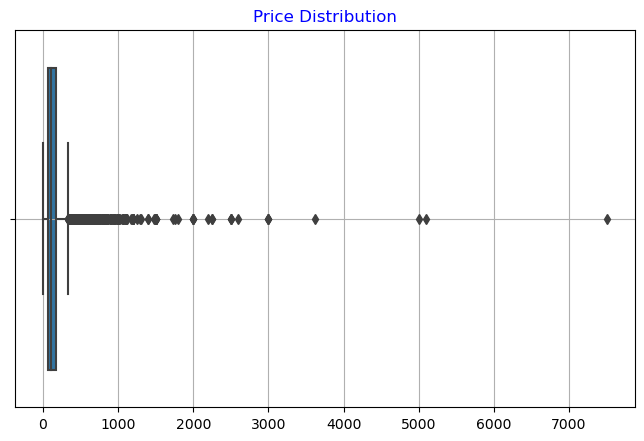

In [32]:
plt.figure(figsize = (8, 5), dpi = 100)
sns.boxplot(df['price'])
plt.xlabel(None)
plt.title('Price Distribution', c = 'b')
plt.grid()
plt.show()

In [33]:
# The first thing about this plot is that it is skewed to the left. Considering that AIRBNB is majorly known
# for cotaining affordable options, it should be more logical, and highly likely profitable, to list
# a place for a cheaper price.
# Another notable thing about this plot is the rarity of samples with prices above 2000 usd.
# It seems that there are samples with prices equal to zero, which need to be analyzed.

In [34]:
mask = df['price'] < 5
df[mask].head(10)

,listing_id,price,district,nbhood,description,room_type,host_name,last_review
10861,20333471,0,Bronx,East Morrisania,‚òÖHostel Style Room | Ideal Traveling Buddies‚òÖ,private room,Anisha,2019-06-24
10958,20523843,0,Brooklyn,Bushwick,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",private room,Martial Loft,2019-05-18
11023,20639628,0,Brooklyn,Bedford-Stuyvesant,Spacious comfortable master bedroom with nice ...,private room,Adeyemi,2019-06-15
11024,20639792,0,Brooklyn,Bedford-Stuyvesant,Contemporary bedroom in brownstone with nice view,private room,Adeyemi,2019-06-21
11025,20639914,0,Brooklyn,Bedford-Stuyvesant,Cozy yet spacious private brownstone bedroom,private room,Adeyemi,2019-06-23
11577,21291569,0,Brooklyn,Bushwick,Coliving in Brooklyn! Modern design / Shared room,shared room,Sergii,2019-06-22
11589,21304320,0,Brooklyn,Bushwick,Best Coliving space ever! Shared room.,shared room,Sergii,2019-05-24


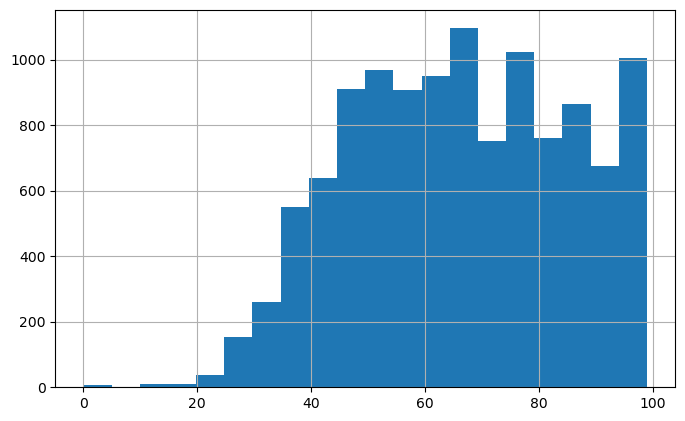

In [35]:
mask = df['price'] < 100

plt.figure(figsize = (8, 5), dpi = 100)
plt.hist(df[mask]['price'], bins = 20)
plt.xlabel(None)
plt.grid()
plt.show()

In [36]:
# Observing the chart, and considering that the price divided into ranges with width equal to 5,
# there seems to be no sample with price value under 10 and above zero. Thus, the samples with price 
# equal to zero are highly likely recorded falsely.

In [37]:
mask = df['price'] == 0
df[mask]

,listing_id,price,district,nbhood,description,room_type,host_name,last_review
10861,20333471,0,Bronx,East Morrisania,‚òÖHostel Style Room | Ideal Traveling Buddies‚òÖ,private room,Anisha,2019-06-24
10958,20523843,0,Brooklyn,Bushwick,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",private room,Martial Loft,2019-05-18
11023,20639628,0,Brooklyn,Bedford-Stuyvesant,Spacious comfortable master bedroom with nice ...,private room,Adeyemi,2019-06-15
11024,20639792,0,Brooklyn,Bedford-Stuyvesant,Contemporary bedroom in brownstone with nice view,private room,Adeyemi,2019-06-21
11025,20639914,0,Brooklyn,Bedford-Stuyvesant,Cozy yet spacious private brownstone bedroom,private room,Adeyemi,2019-06-23
11577,21291569,0,Brooklyn,Bushwick,Coliving in Brooklyn! Modern design / Shared room,shared room,Sergii,2019-06-22
11589,21304320,0,Brooklyn,Bushwick,Best Coliving space ever! Shared room.,shared room,Sergii,2019-05-24


In [38]:
df_brooklyn = df[df['district'] == 'Brooklyn']
mask = df_brooklyn['room_type'] == 'private room'
df_brooklyn[mask].sample(10)

,listing_id,price,district,nbhood,description,room_type,host_name,last_review
12921,22814859,80,Brooklyn,Canarsie,Cozy Private 1 Bedroom in a Shared Area,private room,Terry,2019-02-16
14015,24608893,89,Brooklyn,Williamsburg,Huge light filled bedroom in trendy Williamsburg,private room,Samia,2019-06-17
8236,15928635,40,Brooklyn,Bushwick,"Sunny, Cozy, Private Room In The Heart of Bush...",private room,Dylana,2019-06-24
8524,16323461,124,Brooklyn,Williamsburg,"Williamsburg Experience, Quick Manhattan Access",private room,Inese & Michæl,2019-06-07
16232,27756576,42,Brooklyn,Bedford-Stuyvesant,Brooklyn Bedroom for two friends sharing!!,private room,Eibhlin,2019-05-16
20088,31315296,59,Brooklyn,Sunset Park,Cozy/Private Room in Park Slope,private room,Lissette,2019-06-29
23393,34416958,58,Brooklyn,Bedford-Stuyvesant,Comfortable room at Brooklyn close to the subway,private room,Vitória,2019-07-04
15608,26984883,95,Brooklyn,Williamsburg,HIGH END QUEEN BED -EXPOSED BRICK IN WILLIAMSBURG,private room,Cherri,2019-06-09
15569,26924800,79,Brooklyn,Bedford-Stuyvesant,Beautiful Clean Room For One,private room,Septina,2019-06-20
7625,14787776,120,Brooklyn,Williamsburg,1 Beautiful Private Bedroom In Prime Williamsburg,private room,Nicolette,2019-05-12


In [39]:
mask = df_brooklyn['room_type'] == 'private room'
df_brooklyn[mask]['price'].describe()

count    4910.000000
mean       72.629328
std       115.075108
min         0.000000
25%        50.000000
50%        65.000000
75%        80.000000
max      7500.000000
Name: price, dtype: float64

In [40]:
mask = df_brooklyn['room_type'] == 'shared room'
df_brooklyn[mask]['price'].describe()

count    189.000000
mean      39.005291
std       24.529942
min        0.000000
25%       27.000000
50%       35.000000
75%       40.000000
max      250.000000
Name: price, dtype: float64

In [41]:
mask = df_brooklyn['nbhood'] == 'Bushwick'
df_brooklyn[mask]['price'].describe()

count    1202.000000
mean       91.113145
std        84.862413
min         0.000000
25%        50.000000
50%        70.000000
75%       100.000000
max      2000.000000
Name: price, dtype: float64

In [42]:
mask = df_brooklyn['nbhood'] == 'Bedford-Stuyvesant'
df_brooklyn[mask]['price'].describe()

count    2209.000000
mean      104.632413
std        75.717221
min         0.000000
25%        58.000000
50%        85.000000
75%       130.000000
max      1067.000000
Name: price, dtype: float64

In [43]:
# It seems neither of the columns "district", "nbhood", and "room_type" os the underlying reason for the 
# zero price. Regarding that there are only a minority of samples with this problem, in that they won't
# affect the stats of either of the columns, I believe the best approach is to exclude these samples from 
# the whole dataset. 

In [44]:
df.sort_values(by = 'price', ascending = False).head(10)

,listing_id,price,district,nbhood,description,room_type,host_name,last_review
23916,34895693,7500,Brooklyn,East Flatbush,Gem of east Flatbush,private room,Sandra,2019-07-07
22085,33397385,5100,Manhattan,Midtown,Midtown Manhattan great location (Gramacy park),entire home/apt,Debra,2019-06-22
18430,30035166,5000,Manhattan,Harlem,4-Floor Unique Event Space 50P Cap. - #10299B,entire home/apt,Rasmus,2019-02-23
21731,33029434,3613,Manhattan,Upper West Side,West 84th Street by (Hidden by Airbnb),entire home/apt,Sally,2019-06-15
12508,22263855,3000,Manhattan,SoHo,SPECTACULAR SOHO GREAT ROOM LOFT 6000sq feet,entire home/apt,Stephanie,2019-06-30
24432,35297214,2995,Manhattan,Chelsea,Amazing Chelsea 4BR Loft!,entire home/apt,Viberlyn,2019-06-24
13528,23860219,2990,Manhattan,Nolita,Designer's Beautiful 2BR Apartment in NOLITA/SOHO,entire home/apt,Ilo And Richard,2019-06-29
21838,33133321,2600,Queens,Bayside,Majestic Mansion LifeStyle :),entire home/apt,Shah,2019-05-30
1234,893413,2500,Manhattan,East Village,Architecturally Stunning Former Synagogue!,entire home/apt,Martin,2019-07-01
23601,34592851,2500,Brooklyn,Crown Heights,Beautiful Brooklyn Brownstone Production Space,entire home/apt,Cheryl,2019-06-08


In [45]:
# Separating the Brooklyn, Manhattan, and Queens from the dataset for further analysis
df_brooklyn = df[df['district'] == 'Brooklyn']
df_manhattan = df[df['district'] == 'Manhattan']
df_queens = df[df['district'] == 'Queens']

In [46]:
mask = df_brooklyn['nbhood'] == 'East Flatbush'
df_brooklyn[mask].sort_values(by = 'price', ascending = False).head(10)

,listing_id,price,district,nbhood,description,room_type,host_name,last_review
23916,34895693,7500,Brooklyn,East Flatbush,Gem of east Flatbush,private room,Sandra,2019-07-07
22386,33618854,425,Brooklyn,East Flatbush,Private House in Trendy Crown Heights,entire home/apt,Yehudis,2019-06-27
11592,21307403,400,Brooklyn,East Flatbush,The Apartment @ 1393,entire home/apt,Adrien,2019-06-19
24934,35772374,399,Brooklyn,East Flatbush,Luxury Brooklyn Condo only 30 min to NYC,entire home/apt,Amer,2019-06-30
14318,25074072,350,Brooklyn,East Flatbush,Family Gather\n 5 bedrooms 3 full baths 2 floors,entire home/apt,Daveth,2019-07-01
7024,13605192,350,Brooklyn,East Flatbush,4 Bedroom House Perfect for Cooperate Rental,entire home/apt,Phillipa,2019-06-24
19883,31142239,300,Brooklyn,East Flatbush,Brooklyn Retreat,entire home/apt,Winston,2019-04-14
15168,26397041,300,Brooklyn,East Flatbush,1940's Historic Brooklyn Townhome,entire home/apt,Mark,2019-06-19
15642,27029508,250,Brooklyn,East Flatbush,Newly Renovated 3 Bedroom Apartment in Brooklyn,entire home/apt,Ashley,2019-07-01
3855,5849991,249,Brooklyn,East Flatbush,3 bedroom Apt at $249 per Night.,entire home/apt,Anthony,2019-06-03


In [47]:
mask_2 = df_brooklyn['room_type'] == 'private room'
df_brooklyn[mask][mask_2].sort_values(by = 'price', ascending = False).head(10)

<ipython-input-47-f08f672217af>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_brooklyn[mask][mask_2].sort_values(by = 'price', ascending = False).head(10)


,listing_id,price,district,nbhood,description,room_type,host_name,last_review
23916,34895693,7500,Brooklyn,East Flatbush,Gem of east Flatbush,private room,Sandra,2019-07-07
10078,19174707,200,Brooklyn,East Flatbush,THE Space,private room,Titus,2019-03-31
24495,35346820,175,Brooklyn,East Flatbush,Private Room in Luxury Penthouse Apartment,private room,Victor,2019-06-30
21680,32968738,175,Brooklyn,East Flatbush,Olive‚Äôs Guest Quarters #1,private room,Arline,2019-07-01
22392,33631732,175,Brooklyn,East Flatbush,Olive's Guest Quarters #2,private room,Arline,2019-06-13
6408,12296996,150,Brooklyn,East Flatbush,Bright apartment in Brooklyn,private room,Salima & Carlos,2019-05-20
13220,23378281,150,Brooklyn,East Flatbush,Spacious Loft Bedroom in Brooklyn With 2 Beds,private room,Nigel,2019-04-24
22686,33873570,125,Brooklyn,East Flatbush,Lexi's Global Retreat in Flatbush! (New Host!!),private room,Anderson,2019-06-27
17345,29043928,125,Brooklyn,East Flatbush,Brooklyn Sanctuary,private room,Parrish,2019-01-01
23168,34255571,120,Brooklyn,East Flatbush,Brooklyn Brownstone (Private Room),private room,Joanna,2019-06-30


In [48]:
df_brooklyn.sort_values(by = 'price', ascending = False).head(10)

,listing_id,price,district,nbhood,description,room_type,host_name,last_review
23916,34895693,7500,Brooklyn,East Flatbush,Gem of east Flatbush,private room,Sandra,2019-07-07
23601,34592851,2500,Brooklyn,Crown Heights,Beautiful Brooklyn Brownstone Production Space,entire home/apt,Cheryl,2019-06-08
8016,15537258,2000,Brooklyn,Bushwick,889 Bushwick Ave,private room,Sean,2019-01-05
19847,31120563,1750,Brooklyn,Prospect Heights,Magnificent 5 Bedroom Brooklyn Townhouse,entire home/apt,Ilsa,2019-07-01
2160,2261367,1485,Brooklyn,Sea Gate,brooklyn 14 bedroom gated community,entire home/apt,Tzvi,2019-06-30
24881,35713184,1400,Brooklyn,Prospect-Lefferts Gardens,"Prospect Park Historic 1BR near 2,5,Q, B, S tr...",entire home/apt,A,2019-07-02
1372,1056256,1395,Brooklyn,Carroll Gardens,Beautiful eco triplex w/green roof. Free yoga/...,entire home/apt,Loretta,2019-06-02
10682,20070296,1095,Brooklyn,Brooklyn Heights,"Stunning Brooklyn Heights House, Manhattan 5 mins",entire home/apt,Tara,2019-03-24
9945,18948914,1067,Brooklyn,Bedford-Stuyvesant,MODERN GARDEN 1BR IN NEWLY RENOVATED TOWNHOUSE,entire home/apt,Akiko,2019-06-29
3064,4227161,1050,Brooklyn,Bedford-Stuyvesant,New York I Love You 7 Bedrooms,entire home/apt,Nirit (Nina),2019-06-10


In [49]:
# After searching AIRBNB website for rooms in "East Flatbush - Brooklyn", I realised that there are
# a few rooms with prices above 5000 USD, and majority of them are private rooms of hotels. As a result,
# even though this sample with price equal to 7500 seems like a noise, it could possibly be just an outlier. 
# However, it should be noted that because of the considerable gap, it might be better to exclude this
# sample for modeling purposes, which cannot be done with this dataset due to the shortage of independent
# variables.

In [50]:
df_manhattan.sort_values(by = 'price', ascending = False).head(10)

,listing_id,price,district,nbhood,description,room_type,host_name,last_review
22085,33397385,5100,Manhattan,Midtown,Midtown Manhattan great location (Gramacy park),entire home/apt,Debra,2019-06-22
18430,30035166,5000,Manhattan,Harlem,4-Floor Unique Event Space 50P Cap. - #10299B,entire home/apt,Rasmus,2019-02-23
21731,33029434,3613,Manhattan,Upper West Side,West 84th Street by (Hidden by Airbnb),entire home/apt,Sally,2019-06-15
12508,22263855,3000,Manhattan,SoHo,SPECTACULAR SOHO GREAT ROOM LOFT 6000sq feet,entire home/apt,Stephanie,2019-06-30
24432,35297214,2995,Manhattan,Chelsea,Amazing Chelsea 4BR Loft!,entire home/apt,Viberlyn,2019-06-24
13528,23860219,2990,Manhattan,Nolita,Designer's Beautiful 2BR Apartment in NOLITA/SOHO,entire home/apt,Ilo And Richard,2019-06-29
1234,893413,2500,Manhattan,East Village,Architecturally Stunning Former Synagogue!,entire home/apt,Martin,2019-07-01
14282,25018204,2500,Manhattan,Harlem,"Paradise Garden, Spa, Steam & Massage Table #1...",entire home/apt,Rasmus,2019-06-24
9480,18094418,2250,Manhattan,SoHo,4000 SqFt Luxury Penthouse - Downtown NYC,entire home/apt,Diana,2019-06-15
9243,17666300,2250,Manhattan,SoHo,Ultimate 50th Floor Downtown Penthouse - 4000...,entire home/apt,Diana,2019-07-01


In [51]:
df_manhattan['price'].describe()

count    10322.000000
mean       184.000678
std        178.181024
min         10.000000
25%         95.000000
50%        149.000000
75%        215.000000
max       5100.000000
Name: price, dtype: float64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


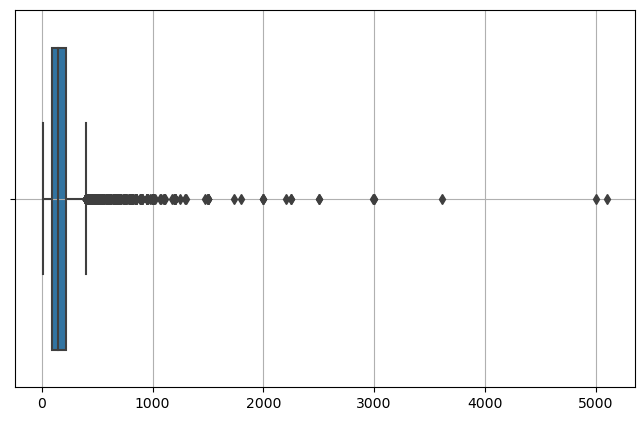

In [52]:
plt.figure(figsize = (8, 5), dpi = 100)
sns.boxplot(df_manhattan['price'])
plt.xlabel(None)
plt.grid()
plt.show()

In [53]:
# Noting that Manhattan is an expensive district, and the fact that the number of samples with prices over 
# 1000 is considerable, the two samples with price over 5000 don't seem like noises. It should be taken into 
# consideration that the gap might cause some inconsistency in the visualizations of the final report, but
# still it is proably better to keep them in the dataset.

In [54]:
df_queens.sort_values(by = 'price', ascending = False).head(10)

,listing_id,price,district,nbhood,description,room_type,host_name,last_review
21838,33133321,2600,Queens,Bayside,Majestic Mansion LifeStyle :),entire home/apt,Shah,2019-05-30
10304,19520573,900,Queens,Forest Hills,"Luxury House in Safe Area, 30 Min to Time Square",private room,Igor,2019-07-05
6373,12221970,750,Queens,Arverne,Ziggy Stardust Surf House - A Beautiful Houseboat,entire home/apt,Ben,2019-06-08
22540,33741545,700,Queens,Astoria,Astoria Apt,private room,Nate,2019-05-06
16667,28287653,600,Queens,Long Island City,Hunters Point 2500sf 3-story Garden Home,entire home/apt,Freda,2019-07-05
22257,33521985,600,Queens,St. Albans,"Kings palace close to jfk, Belmont track & ca...",entire home/apt,Adeola,2019-06-23
9749,18595831,545,Queens,Rockaway Beach,"The Locals House // Best Location, Nicest Home",entire home/apt,Michael,2019-07-07
5331,9427868,500,Queens,Flushing,Grand Home On Kissena Park in Flushing NYC,entire home/apt,Ann,2019-05-31
18045,29736711,485,Queens,Jamaica,La Grand BnB near JFK,entire home/apt,Portia,2019-07-07
12280,22000376,460,Queens,Flushing,2000Âëé Ê≥ïÊãâÁõõÁæé‰∏ΩË±™ÂçéÂ§ßÂ•óÊàø,entire home/apt,Angela,2019-06-24


In [55]:
mask = df_queens['nbhood'] == 'Bayside'
df_queens[mask].sort_values(by = 'price', ascending = False).head(10)

,listing_id,price,district,nbhood,description,room_type,host_name,last_review
21838,33133321,2600,Queens,Bayside,Majestic Mansion LifeStyle :),entire home/apt,Shah,2019-05-30
1049,765563,299,Queens,Bayside,Big Comfy Beds & Breakfast on the Deck,entire home/apt,Norman,2019-06-20
4480,7331070,290,Queens,Bayside,Your own house in NYC,entire home/apt,James,2019-06-09
10093,19188025,239,Queens,Bayside,"Heart of Bayside, modern 3 Bed 2 bath",entire home/apt,Nancy,2019-05-20
13378,23650568,200,Queens,Bayside,2 Bedroom by Bayside Train 21 mins from Manhattan,entire home/apt,Noelle,2019-06-30
10094,19188166,200,Queens,Bayside,Luxury 2bedroom with loft/ 2 bath,entire home/apt,Nancy,2019-06-30
16558,28139041,190,Queens,Bayside,New! 3B2B Bayside/3 blocks to train/25 min to NYC,entire home/apt,Sara,2019-01-01
16183,27703666,120,Queens,Bayside,Sunny Large 1BR w/balcony,entire home/apt,Richard,2019-07-05
16005,27519196,115,Queens,Bayside,Nice Bayside 1 bedroom Apartment,entire home/apt,Miranda,2019-05-19
3495,4956469,80,Queens,Bayside,Contemporary & Clean 1 bdrm Apartment(Lower Le...,entire home/apt,Emmanuel,2019-07-05


In [56]:
# Just like the Brooklyn, the price of 2600 USD for Queens is accetable logically, but it might adversely 
# Aeffect the visualization and analysis. 

# At this point, I believe defining aceptable ranges to rcongnize outliers could be helpful. In the final 
# dashboard, there will be an option to exclude or include outliers in the dataset.
# Defining acceptable ranges could be done in two ways:
# The first appraoch is to define an acceptable range for the whole dataset.
# The second way is to devide the samples based on their district, and then assigning a threshold.
# The first approach looks more straight forward, but it has less precision, as it cannot contain the 
# contrast of different districts, and treat them equally. Regarding this, I would go with the second method.

In [57]:
for i in df['district'].unique():
    mask = df['district'] == i
    mean = df[mask]['price'].mean()
    std = df[mask]['price'].std()
    q1 = df[mask]['price'].describe()['25%']
    q3 = df[mask]['price'].describe()['75%']
    iqr = q3 - q1
    
    method_1_low = max(mean - 3 * std, 0)
    method_1_high = mean + 3 * std
    
    method_2_low = max(q1 - 1.5 * iqr, 0)
    method_2_high = q3 + 1.5 * iqr
    
    print(f'{i} : \n std method : {method_1_low} - {method_1_high} \n iqr method : {method_2_low} - {method_2_high}')
    

Manhattan : 
 std method : 0 - 718.5437490544009 
 iqr method : 0 - 395.0
Brooklyn : 
 std method : 0 - 493.77820378492964 
 iqr method : 0 - 280.5
Queens : 
 std method : 0 - 328.35792000284204 
 iqr method : 0 - 197.5
Staten Island : 
 std method : 0 - 249.91876225585668 
 iqr method : 0 - 187.5
Bronx : 
 std method : 0 - 253.38866470668796 
 iqr method : 0 - 170.0


In [58]:
# As it can be seen, standard deviation method gives wider ranges, and thus, using it results in losing 
# fewer samples.

In [59]:
ranges = []
for i in df['district'].unique():
    mask = df['district'] == i
    mean = df[mask]['price'].mean()
    std = df[mask]['price'].std()
    
    high = round(mean + 3 * std)
    
    ranges.append([i, high])

print(ranges)

[['Manhattan', 719], ['Brooklyn', 494], ['Queens', 328], ['Staten Island', 250], ['Bronx', 253]]


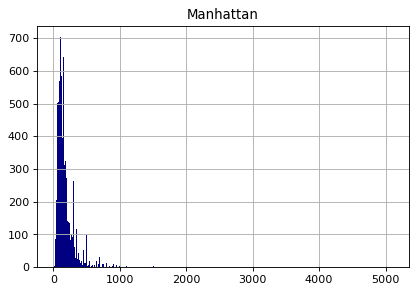

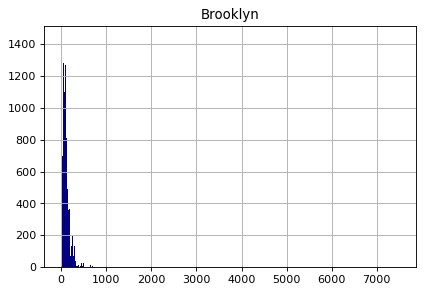

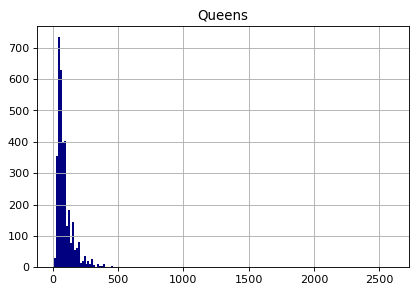

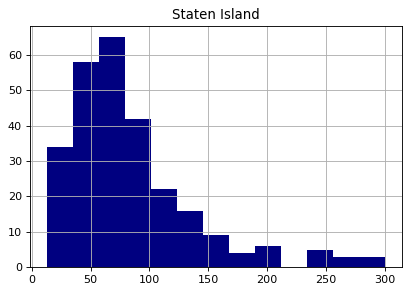

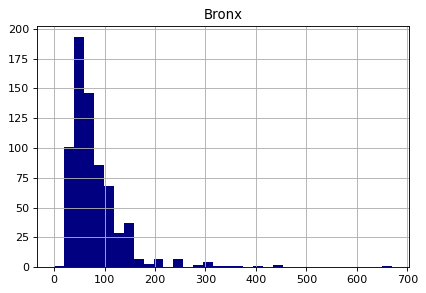

In [60]:
for i in df['district'].unique():
    mask = df['district'] == i
    plt.figure(figsize = (6, 4), dpi = 80)
    plt.hist(df[mask]['price'], bins = len(df[mask]) // 20, color = 'navy')
    plt.title(i)
    plt.grid()
    plt.show()

In [61]:
# As it can be seen, just like the whole dataset, in almost all districts, the distribution of prices is 
# uneven and skewed to the right. The only exception is Staten Island which differs slightly.

In [62]:
# Before proceeding to the next part (month), samples with zero price will be excluded from the dataset.
df_1 = df[df['price'] != 0]
df_1.reset_index(drop = True, inplace = True)
df_1.describe()

,listing_id,price
count,2.520200e+04,25202.000000
mean,2.068920e+07,141.817316
std,1.103081e+07,147.350650
min,2.595000e+03,10.000000
25%,1.202115e+07,69.000000
50%,2.234547e+07,105.000000
75%,3.037697e+07,175.000000
max,3.645581e+07,7500.000000


### District

In [63]:
df_1.groupby(df_1['district'])['price'].describe()[['count', 'mean', 'std', 'min', '50%', 'max']]

,count,mean,std,min,50%,max
district,,,,,,
Bronx,697.0,79.241033,58.051225,20.0,65.0,670.0
Brooklyn,10460.0,121.974665,123.958970,10.0,95.0,7500.0
Manhattan,10322.0,184.000678,178.181024,10.0,149.0,5100.0
Queens,3456.0,92.813947,78.514658,10.0,70.0,2600.0
Staten Island,267.0,86.044944,54.624606,13.0,71.0,300.0


In [64]:
# Based on the table above, the listings in "Manhattan" district are considerably more expensive than their 
# counterparts. On the next levels are "Brooklyn", "Queens", "Staten Island", and "Bronx". While the diffrenec 
# between the last two districts is smaller, it is relatively large between the first three. However, the 
# effect of the number of samples should not be over looked. There are almost the same number of samples, 
# 10 thousands approx., belong to "Manhattan" and "Brooklyn", the two most expensive districts. But this number 
# is less than 3500 for queens, and under 1000 for the two other districts. That is to say, may the larger
# number of listings gives the chance of containing more expensive ones. This could also be taken into 
# consideration while we check the max price for each districts. This number is also the highest for the 
# "Brooklyn" and "Manhattan" respectively, and it is the lowets for "staten Island" and "bronx."

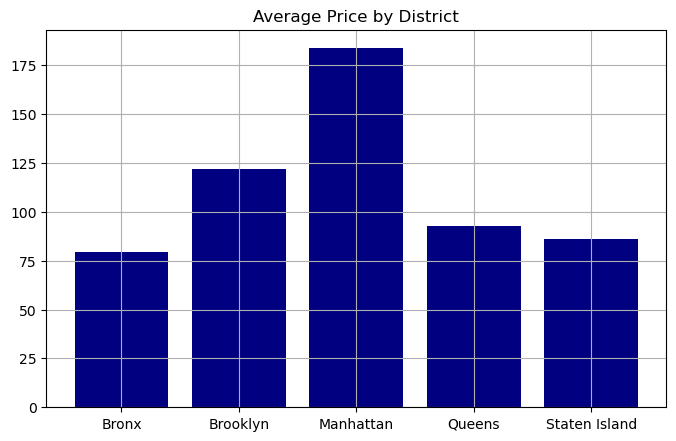

In [65]:
plt.figure(figsize = (8, 5), dpi = 100)
plt.bar(sorted([value for value in df_1['district'].unique()]), df_1.groupby(df_1['district']).agg('mean')['price'],
       color = 'navy')
plt.title('Average Price by District')
plt.grid()
plt.show()

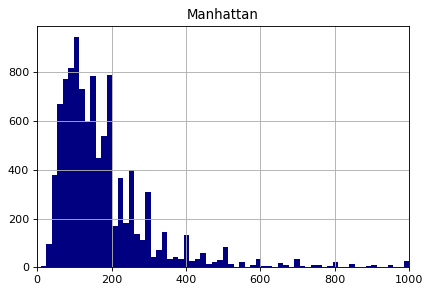

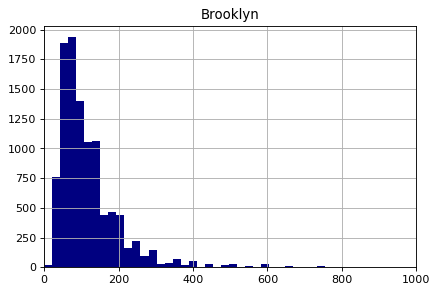

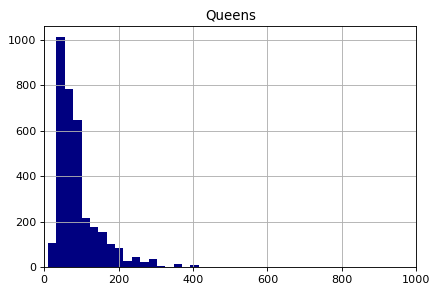

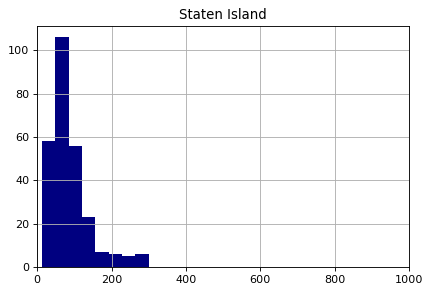

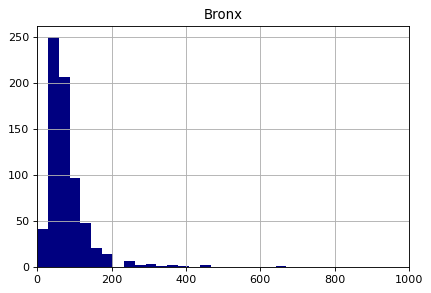

In [66]:
for i in df['district'].unique():
    mask = df['district'] == i
    plt.figure(figsize = (6, 4), dpi = 80)
    plt.hist(df[mask]['price'], bins = len(df[mask]) // 30, color = 'navy')
    plt.title(i)
    plt.xlim(0, 1000)
    plt.grid()
    plt.show()

In [67]:
# As can be concluded from histograms above, the sparsity of samples regarding the price in Manhattan
# is much more than other districts. Even though the samples above 400 are rare, in Manhattan, they are 
# still a consierable part. Also, all samples are congested in the 0-200 usd area, and this congestion
# drops rapidly after 200, but in Manhattan, there are lots of samples with prices in 200-400 usd range.

# For the "Manhattan" and "brooklyn" districts, we might be able to get deeper and compare different
# neighberhoods, considering the number of samples.

### Neighborhoods

In [68]:
mask = df_1['district'] == 'Manhattan'
len(df_1[mask]['nbhood'].unique())

32

In [69]:
target_nbhoods = []
for nbhood in df_1[mask]['nbhood'].value_counts().index:
    if df_1[mask]['nbhood'].value_counts()[nbhood] > 100 :
        target_nbhoods.append(nbhood)
        
print(target_nbhoods)

['Harlem', "Hell's Kitchen", 'East Village', 'Upper East Side', 'Upper West Side', 'East Harlem', 'Midtown', 'Chelsea', 'Lower East Side', 'Washington Heights', 'Financial District', 'West Village', 'Chinatown', 'SoHo', 'Murray Hill', 'Kips Bay', 'Greenwich Village', 'Gramercy', 'Nolita', 'Inwood', 'Morningside Heights', 'Theater District']


In [70]:
# These are the nighborhoods in "Manhattan" district that over 100 samples for each are available.

In [71]:
mean_price = []
mask = df_1['district'] == 'Manhattan'
for nbhood in target_nbhoods:
    nbhood_mask = df_1['nbhood'] == nbhood
    mean_price.append(df_1[mask][nbhood_mask]['price'].mean())

mhn_avg_per_nb = dict(zip(target_nbhoods, mean_price))
mhn_avg_per_nb

<ipython-input-71-9404b337bd3a>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_price.append(df_1[mask][nbhood_mask]['price'].mean())


{'Harlem': 121.75331010452962,
 "Hell's Kitchen": 190.73100983020555,
 'East Village': 184.28175519630486,
 'Upper East Side': 173.3206197854589,
 'Upper West Side': 181.13935483870966,
 'East Harlem': 127.17113095238095,
 'Midtown': 272.2138157894737,
 'Chelsea': 222.03529411764706,
 'Lower East Side': 177.51626898047724,
 'Washington Heights': 90.75743707093821,
 'Financial District': 238.78877005347593,
 'West Village': 258.7625698324022,
 'Chinatown': 162.79207920792078,
 'SoHo': 299.16230366492147,
 'Murray Hill': 240.36702127659575,
 'Kips Bay': 197.0934065934066,
 'Greenwich Village': 239.23030303030302,
 'Gramercy': 214.78846153846155,
 'Nolita': 230.4322033898305,
 'Inwood': 85.94017094017094,
 'Morningside Heights': 116.47747747747748,
 'Theater District': 234.2314814814815}

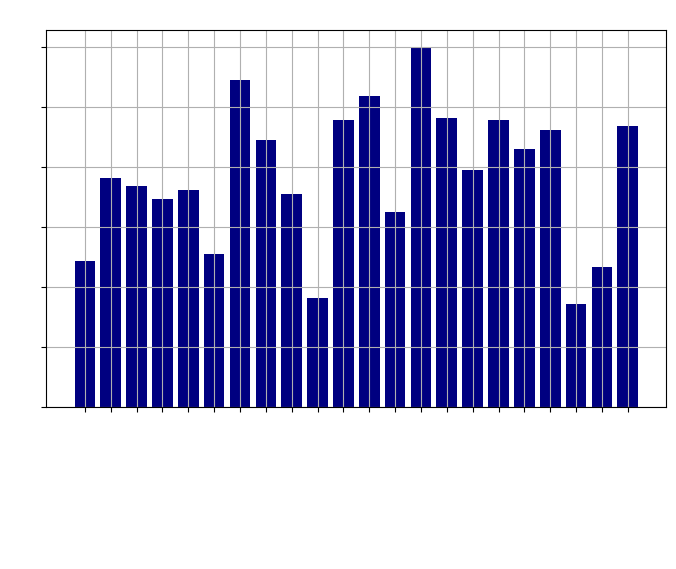

In [72]:
plt.figure(figsize = (8, 5), dpi = 100)
plt.bar(mhn_avg_per_nb.keys(), mhn_avg_per_nb.values(), color = 'navy')
plt.title('Manhattan Average per by Neighborhoods', c = 'w')
plt.xticks(rotation = 90, c = 'w')
plt.yticks(c = 'w')
plt.grid()
plt.show()

In [73]:
# Using the chart above, we can compare the average price of AirBnB listings in different neighborhoods of 
# Manhattan. It should be noted that the neighborhoods are in order regarding the number of samples.
# Among these neighborhoods, SoHo has the highest average price which is 300. This is followed by Midtown,
# West Village, Financial District, and Theater District respectively. On the other side, the most affordable
# Neighborhoods are Inwood, Washington Heights, Morningside Heights, Harlem, and East Harlem. 

# Generally, 10 neighborhoods have average price of over 200 usd, among which 3 are more than 250 dollars.
# Taking into account that the majority of samples in the whole dataset are priced under 200, this could
# be of great importance. In contrast, the average price of only 4 neighborhoods is under 150 usd, and only
# 2 are lower than 100 usd. 

# Now, the very same approach is being explioted for "Brooklyn".

In [74]:
mask = df_1['district'] == 'Brooklyn'
len(df_1[mask]['nbhood'].unique())

47

In [75]:
target_nbhoods = []
for nbhood in df_1[mask]['nbhood'].value_counts().index:
    if df_1[mask]['nbhood'].value_counts()[nbhood] > 100 :
        target_nbhoods.append(nbhood)
        
print(target_nbhoods)

['Bedford-Stuyvesant', 'Williamsburg', 'Bushwick', 'Crown Heights', 'Greenpoint', 'East Flatbush', 'Flatbush', 'Prospect-Lefferts Gardens', 'Clinton Hill', 'Fort Greene', 'Park Slope', 'Sunset Park', 'East New York', 'Prospect Heights', 'South Slope', 'Gowanus', 'Carroll Gardens', 'Canarsie', 'Cypress Hills']


In [76]:
mean_price = []
mask = df_1['district'] == 'Brooklyn'
for nbhood in target_nbhoods:
    nbhood_mask = df_1['nbhood'] == nbhood
    mean_price.append(df_1[mask][nbhood_mask]['price'].mean())

brn_avg_per_nb = dict(zip(target_nbhoods, mean_price))
brn_avg_per_nb

<ipython-input-76-a63917e516cf>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_price.append(df_1[mask][nbhood_mask]['price'].mean())


{'Bedford-Stuyvesant': 104.77470534904805,
 'Williamsburg': 148.7825148407987,
 'Bushwick': 91.34111759799833,
 'Crown Heights': 123.59308510638297,
 'Greenpoint': 138.71816283924844,
 'East Flatbush': 112.54798761609906,
 'Flatbush': 96.13559322033899,
 'Prospect-Lefferts Gardens': 107.81506849315069,
 'Clinton Hill': 164.45390070921985,
 'Fort Greene': 158.25,
 'Park Slope': 178.36244541484717,
 'Sunset Park': 100.51162790697674,
 'East New York': 87.683908045977,
 'Prospect Heights': 153.04142011834318,
 'South Slope': 143.1744966442953,
 'Gowanus': 163.36496350364965,
 'Carroll Gardens': 171.36206896551724,
 'Canarsie': 93.4090909090909,
 'Cypress Hills': 89.23853211009174}

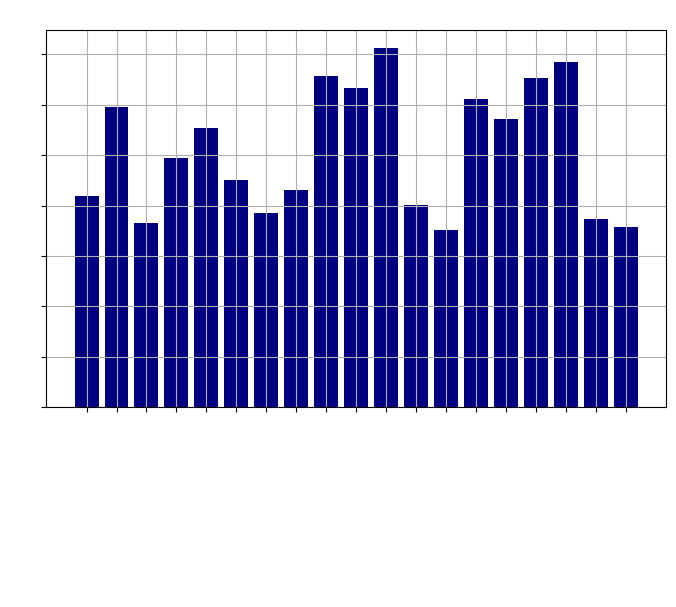

In [77]:
plt.figure(figsize = (8, 5), dpi = 100)
plt.bar(brn_avg_per_nb.keys(), brn_avg_per_nb.values(), color = 'navy')
plt.title('Brooklyn Average per by Neighborhoods', c = 'w')
plt.xticks(rotation = 90, c = 'w')
plt.yticks(c = 'w')
plt.grid()
plt.show()

In [78]:
# Unlike "Manhattan", none of the target neighborhoods in "Brooklyn" has a price average over 200 USD. 
# There are 6 neighborhoods with mean value of over 150 USD, among which, Park Slope and Carroll Gardens
# are the most expensive ones respectively. Also, only 5 neighborhoods have an average price of under 100 
# USD, and their difference is negligible. 

# Comparing this plot, with that of "Manhattan", we can clearly see that "Manhattan" is significantly more
# expensive, and "Brooklyn" is more affordable.

In [79]:
# Checking Queens to see if camparing neighborhoods could yiled meaningful results
mask = df_1['district'] == 'Queens'
df_1[mask]['nbhood'].value_counts()

Astoria                448
Flushing               319
Long Island City       282
Sunnyside              201
Ridgewood              198
Ditmars Steinway       173
Jamaica                161
East Elmhurst          157
Elmhurst               155
Jackson Heights        130
Woodside               127
Springfield Gardens     73
Forest Hills            72
Rego Park               72
Maspeth                 68
Richmond Hill           64
Woodhaven               62
Arverne                 60
St. Albans              58
Corona                  52
Queens Village          48
Rosedale                41
Rockaway Beach          41
Glendale                39
Ozone Park              39
Briarwood               33
South Ozone Park        32
Bayside                 28
Fresh Meadows           25
Middle Village          22
Kew Gardens             18
Kew Gardens Hills       18
Far Rockaway            15
Laurelton               13
Jamaica Estates         13
Howard Beach            12
College Point           12
B

In [80]:
# As it can be seen, there are plenty of neighborhoods with more than 100 samples (the initial threshold).
# So, this district can also be analyzed by comparing the different neighborhoods that is contains.

In [81]:
target_nbhoods = []
for nbhood in df_1[mask]['nbhood'].value_counts().index:
    if df_1[mask]['nbhood'].value_counts()[nbhood] > 100 :
        target_nbhoods.append(nbhood)
        
print(target_nbhoods)

['Astoria', 'Flushing', 'Long Island City', 'Sunnyside', 'Ridgewood', 'Ditmars Steinway', 'Jamaica', 'East Elmhurst', 'Elmhurst', 'Jackson Heights', 'Woodside']


In [82]:
mean_price = []
mask = df_1['district'] == 'Queens'
for nbhood in target_nbhoods:
    nbhood_mask = df_1['nbhood'] == nbhood
    mean_price.append(df_1[mask][nbhood_mask]['price'].mean())

qn_avg_per_nb = dict(zip(target_nbhoods, mean_price))
qn_avg_per_nb

<ipython-input-82-d652b2e6d998>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_price.append(df_1[mask][nbhood_mask]['price'].mean())


{'Astoria': 100.54910714285714,
 'Flushing': 81.94043887147335,
 'Long Island City': 118.59929078014184,
 'Sunnyside': 83.21890547263682,
 'Ridgewood': 86.0,
 'Ditmars Steinway': 90.94797687861272,
 'Jamaica': 82.8695652173913,
 'East Elmhurst': 77.42038216560509,
 'Elmhurst': 80.97419354838709,
 'Jackson Heights': 79.81538461538462,
 'Woodside': 87.59055118110236}

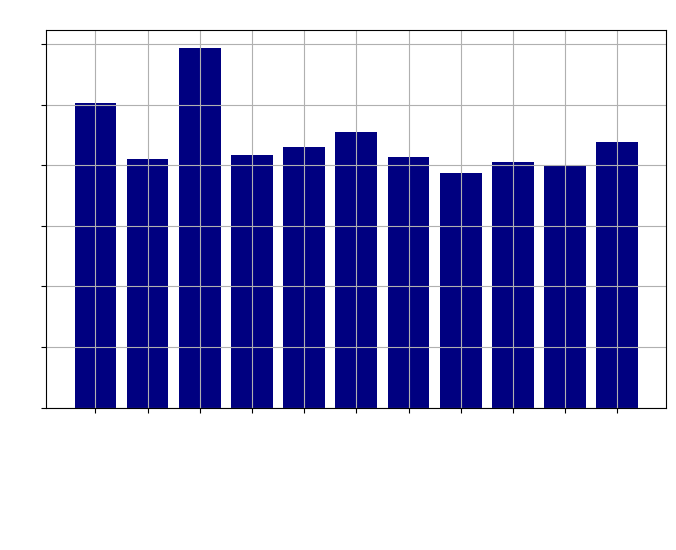

In [83]:
plt.figure(figsize = (8, 5), dpi = 100)
plt.bar(qn_avg_per_nb.keys(), qn_avg_per_nb.values(), color = 'navy')
plt.title('Brooklyn Average Price by Neighborhoods', c = 'w')
plt.xticks(rotation = 75, c = 'w')
plt.yticks(c = 'w')
plt.grid()
plt.show()

In [84]:
# Considering that the number of samples in this district is significantly lower than "Manhattan" and
# "Brooklyn", there are fewer neighborhoods to compare. 

# Based on this chart, in most of the neighborhoods of "Queens", the average price of AirBnB listings is in
# 80 - 100 range. The most expensive neighborhood is Long Island City with mean price of almost 120 USD, and
# the cheapest is East Elmhurst with mean price slighly less than 80 USD. 

# The notable thing about this district is that the differences in prices of neighborhoods is not significant.
# However, this could also be affected by the lower number of samples.

### Room Type

In [85]:
df_1['room_type'].value_counts()

entire home/apt    13266
private room       11351
shared room          585
Name: room_type, dtype: int64

In [86]:
df_1.groupby('room_type')['price'].describe()[['count', 'mean', 'std', 'min', '50%', 'max']]

,count,mean,std,min,50%,max
room_type,,,,,,
entire home/apt,13266.0,197.166667,165.80309,10.0,159.0,5100.0
private room,11351.0,81.674126,91.50744,10.0,70.0,7500.0
shared room,585.0,53.647863,45.66299,13.0,41.0,800.0


In [87]:
# As it is expected, the average price of entire homes or apartments is significantly higher than those of
# private rooms and shared rooms. Moreover, Shared rooms are also more affordable than private rooms. 
# Considering the min and max of each group, shared rooms has the highest min value, 13 USD, while it is 
# equal to 10 USD for both other groups. 
# On the other hand, the most expensive sample is a private room, with the price tag of 7500 USD. 
# The standard deviation is relatively high, which has been the case with this dataset rageding the price.

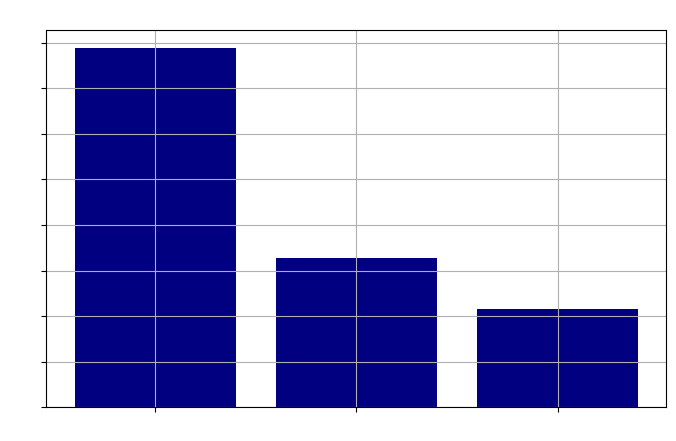

In [88]:
plt.figure(figsize = (8, 5), dpi = 100)
plt.bar(df_1.groupby('room_type').agg('mean')['price'].index,
        df_1.groupby('room_type').agg('mean')['price'].values, color = 'navy')
plt.title("Mean Price by Room Type", c = 'w')
plt.xticks(c = 'w')
plt.yticks(c = 'w')
plt.grid()
plt.show()

In [89]:
df_1.groupby(['district', 'room_type']).agg('mean')['price']

district       room_type      
Bronx          entire home/apt    120.517241
               private room        56.292804
               shared room         33.030303
Brooklyn       entire home/apt    169.903671
               private room        72.688545
               shared room         39.422460
Manhattan      entire home/apt    238.024473
               private room       105.698795
               shared room         72.960159
Queens         entire home/apt    140.931086
               private room        63.741165
               shared room         40.767857
Staten Island  entire home/apt    116.774436
               private room        56.060606
               shared room         21.500000
Name: price, dtype: float64

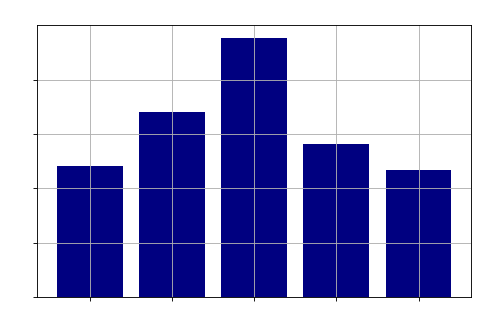

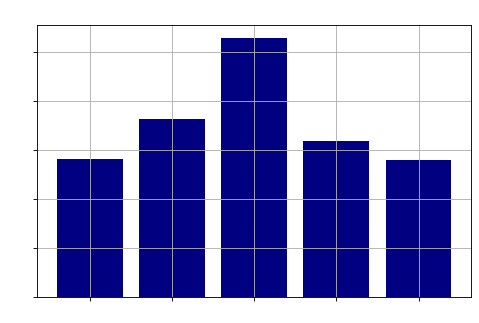

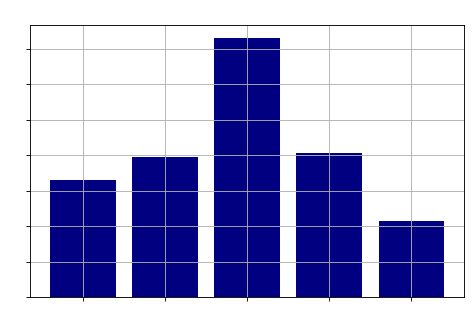

In [90]:
for room in df_1['room_type'].unique():
    mask = df_1['room_type'] == room
    df_1[mask].groupby('district').agg('mean')['price']
    plt.figure(figsize = (7, 4.5), dpi = 80)
    plt.bar(df_1[mask].groupby('district').agg('mean')['price'].index, 
            df_1[mask].groupby('district').agg('mean')['price'], color = 'navy')
    plt.title(f'Average Price of {room}s', c = 'w')
    plt.xticks(c = 'w')
    plt.yticks(c = 'w')
    plt.grid()
    plt.show()

In [91]:
# Comparing the charts above, it is obvious that Manhattan has the highest price in all three categories.
# Regarding the first and second group, "Brooklyn" and "Queens" are the next expensive districts respectively.
# However, regarding shared rooms, "Queens" is priced slightly higher than "Brooklyn".
# On the other hand, "Staten Island" is the cheapest among the five districts, and it is followed by "Bronx".
# It is notable that in Private rooms group, their contarst is negligible.

# Another mention worthy thing is that the difference of "Manhattan" with other districts is much more 
# significant in shared rooms group. The average price of a shared room in "Manhattan" is above 70 USD, while
# the this number is about 40 USD for the next expensive district, "Quuens".
# In contrast, private rooms in "Manhattan" has an average price of 100 USD approx., and this is about 70 USD
# for "Brooklyn" which is the second most expensive district.

### Last Review

In [92]:
df_1.groupby(df_1['last_review'].dt.month).describe()['price'][['count', 'mean']]

,count,mean
last_review,,
1,1440.0,140.556250
2,470.0,145.612766
3,820.0,136.243902
4,1456.0,143.211538
5,3695.0,139.601894
6,12596.0,141.669657
7,4725.0,144.487831


In [93]:
# Considering that the "last_review" column include the information about the date of latest reviews, I am
# not sure what sort of analysis I can do on it, and what kind of conclusion I should look for. Besides, the
# following conclusions are the only logical ones that I can think of.

# Based on the table above, the number of reviews declined from January to February. While it was 1440 for 
# January, it declinecd to less than half for Februrary, at 470. However, this number grows rapidly till June,
# and it as reached its peak on June at about 12600. 
# The downtrend from June to July can be justified by the fact that the dates span is from January 1st, till
# July 9th, and not all dates of July has been covered. 
# The rapid growth from February to July is logical to me. It seems like most of listing had been reviewed 
# at least once later in this time span. But, the difference between January and February is ambigous. There
# must be an underlying reason to expalin why 1440 of listing reviewed in January, has never been reviewed
# again? 

# All in all, I believe the information that would be absolutely more valuable for this analysis is the 
# listing date, but with this data that we have, I'm spectical that a reasonable and logical result could be
# yielded from the dates ! 

### Getting Data Ready for Dashboard

In [94]:
# Apart from excluding the small number of samples with the price value equal to zero, the data should be 
# checked for missing values. Moreover, adding a column including the information if the sample is an outlier
# or not, based on statistical approaches, could help with changing the visuals dynamically. Note that the
# ranges for outliers has been defined in the previous section under that "Price" tab, and each district
# has it's own range, which can help with losing less data, and sounds more reasonabale as the statistics
# diffres significantly from one district to another. 

In [95]:
df_1.isnull().sum()

listing_id      0
price           0
district        0
nbhood          0
description    10
room_type       0
host_name       8
last_review     0
dtype: int64

In [96]:
# As there are only 10 samples with missing values on the column "description", and the fact that this column
# is of no use to us (at least at this project), all samples could be retained intact. 

In [97]:
print(ranges)

[['Manhattan', 719], ['Brooklyn', 494], ['Queens', 328], ['Staten Island', 250], ['Bronx', 253]]


In [98]:
ranges_dict = dict(zip([i[0] for i in ranges], [i[1] for i in ranges]))
ranges_dict

{'Manhattan': 719,
 'Brooklyn': 494,
 'Queens': 328,
 'Staten Island': 250,
 'Bronx': 253}

In [99]:
outlier = []
for i in range(len(df_1)):
    sample = df_1.iloc[i, :]
    outlier.append(sample['price'] > ranges_dict[sample['district']])

print(sum(outlier))

334


In [100]:
# There has been 334 outliers, now this can be checked that if these outliers has been recongnized properly.

In [101]:
outlier_arr = np.array(outlier, int).reshape(-1,1)
outlier_arr.shape

(25202, 1)

In [102]:
df_1.shape

(25202, 8)

In [103]:
df_1['outlier'] = outlier_arr
df_1

<ipython-input-103-5f4aa28b32a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['outlier'] = outlier_arr


,listing_id,price,district,nbhood,description,room_type,host_name,last_review,outlier
0,2595,225,Manhattan,Midtown,Skylit Midtown Castle,entire home/apt,Jennifer,2019-05-21,0
1,3831,89,Brooklyn,Clinton Hill,Cozy Entire Floor of Brownstone,entire home/apt,LisaRoxanne,2019-07-05,0
2,5099,200,Manhattan,Murray Hill,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Chris,2019-06-22,0
3,5178,79,Manhattan,Hell's Kitchen,Large Furnished Room Near B'way,private room,Shunichi,2019-06-24,0
4,5238,150,Manhattan,Chinatown,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Ben,2019-06-09,0
...,...,...,...,...,...,...,...,...,...
25197,36425863,129,Manhattan,Upper East Side,Lovely Privet Bedroom with Privet Restroom,private room,Rusaa,2019-07-07,0
25198,36427429,45,Queens,Flushing,No.2 with queen size bed,private room,H Ai,2019-07-07,0
25199,36438336,235,Staten Island,Great Kills,Seas The Moment,private room,Ben,2019-07-07,0
25200,36442252,100,Bronx,Mott Haven,1B-1B apartment near by Metro,entire home/apt,Blaine,2019-07-07,0


In [104]:
mask = df_1['outlier'] == 1
len(df_1[mask])

334

In [105]:
ranges_dict

{'Manhattan': 719,
 'Brooklyn': 494,
 'Queens': 328,
 'Staten Island': 250,
 'Bronx': 253}

In [106]:
df_1[mask].sample(10)

,listing_id,price,district,nbhood,description,room_type,host_name,last_review,outlier
22815,33970850,350,Queens,Jamaica,SummerWintersGetaway- 8 mins from JFK,entire home/apt,Yolander,2019-06-09,1
12210,21948560,850,Manhattan,Tribeca,Luxury Skyline Views! Best Panaromic Views Of ...,entire home/apt,Sofia,2019-06-19,1
9479,18094212,700,Brooklyn,Cobble Hill,Beautiful 3000-Square-Ft Brownstone in Cobble ...,entire home/apt,Joanna,2019-01-23,1
9525,18201148,379,Queens,Long Island City,"5* Views, Terrace, 2BR2B, Modern Luxury, Gym, ...",entire home/apt,B,2019-06-26,1
5554,9793542,799,Manhattan,SoHo,Stunning SoHo 1400sqft LOFT/DUPLEX on Best Street,entire home/apt,Allegra,2019-04-28,1
4752,7987209,1195,Manhattan,Theater District,Floor 35th in the heart of New York,entire home/apt,Ricardo,2019-06-02,1
7734,14994076,299,Bronx,Eastchester,Dominiques NYC 4Bedrm crashpad**Stay here**metro,entire home/apt,Vie,2019-05-21,1
18038,29736711,485,Queens,Jamaica,La Grand BnB near JFK,entire home/apt,Portia,2019-07-07,1
18423,30035166,5000,Manhattan,Harlem,4-Floor Unique Event Space 50P Cap. - #10299B,entire home/apt,Rasmus,2019-02-23,1
23883,34859949,1000,Manhattan,Midtown,Amazing Townhouse Experience with Private Garden,entire home/apt,Jennifer,2019-06-30,1


In [107]:
# Running the block above several times, it seems that all the outliers marked correctly. 

In [109]:
df_1.to_excel('E:/Excel outputs/NY_AirBnb_Data.xlsx', index = False)